In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pygrib
from netCDF4 import Dataset

In [ ]:
path_to_model = "/mnt/data-weather/moddata/modgrb/"
path_to_satellite = "/mnt/data-weather/satdata/satnc/band2346/"
path_to_radar = "/mnt/data-weather/raddata/raddat/"

In [ ]:
path_to_model_output = "/mnt/data-weather/moddata/modpng/"
path_to_satellite_output = "/mnt/data-weather/satdata/satpng/band2346/"
path_to_radar_output = "/mnt/data-weather/raddata/radpng/"

KeyboardInterrupt: 

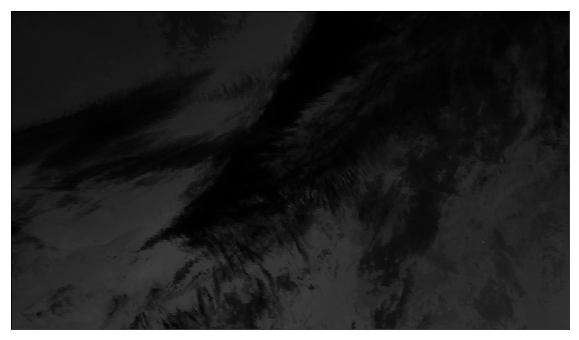

In [92]:
path_to_satellite = "/mnt/data-weather/corr/sat/band2/"
path_to_satellite_output = "/mnt/data-weather/corr/A2/"
directory = os.fsencode(path_to_satellite)

fig = plt.figure(figsize=(10,10))
m = Basemap(projection='mill',
            resolution=None,
            llcrnrlon=-102,
            urcrnrlon=-82,
            llcrnrlat=31,
            urcrnrlat=41)

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    #print(filename)
    nc = Dataset(path_to_satellite+filename, 'r')
    #extracting the data we want from the file
    data = nc.variables['data'][:][0]
    lat = nc.variables['lat'][:]
    lon = nc.variables['lon'][:]
    nc.close()
    #print(data.shape, lat.shape, lon.shape)
    x,y = m(lon,lat)
    cs = m.pcolormesh(x,y,data,shading='flat',cmap="gray")
    fig.savefig(path_to_satellite_output+filename[0:-3]+".png",
                bbox_inches='tight',
                pad_inches=-0.08)

plt.close(fig)

In [14]:
import os
from shutil import copy2
path_to_satellite = "/mnt/data-weather/satdata/satnc/band2346/"
path_to_other = "/mnt/data-weather/satdata/satnc/other/"
directory = os.fsencode(path_to_satellite)
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    #print(filename[18:20])
    if filename[18:20] == "15":
        copy2(path_to_satellite+filename, path_to_other+filename)

In [41]:
from datetime import timedelta
import datetime
directory = os.fsencode(path_to_other)
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    print(filename)
    print(filename[12:15])
    date = datetime.datetime(2017, 1, 1) + datetime.timedelta(int(filename[12:15]) - 1)
    if (date.month <= 9 and date.day <= 9):
        #print("sat."+str(date.year)+"0"+str(date.month)+"0"+str(date.day)+"."+filename[16:18]+"."+filename[28:30]+".nc")
        name = "sat."+str(date.year)+"0"+str(date.month)+"0"+str(date.day)+"."+filename[16:18]+"."+filename[28:30]+".nc"
    elif (date.month <= 9 and date.day > 9):
        #print("sat."+str(date.year)+"0"+str(date.month)+str(date.day)+"."+filename[16:18]+"."+filename[28:30]+".nc")
        name = "sat."+str(date.year)+"0"+str(date.month)+str(date.day)+"."+filename[16:18]+"."+filename[28:30]+".nc"
    elif (date.month > 9 and date.day <= 9):
        #print("sat."+str(date.year)+str(date.month)+"0"+str(date.day)+"."+filename[16:18]+"."+filename[28:30]+".nc")
        name = "sat."+str(date.year)+str(date.month)+"0"+str(date.day)+"."+filename[16:18]+"."+filename[28:30]+".nc"
    else:
        #print("sat."+str(date.year)+str(date.month)+str(date.day)+"."+filename[16:18]+"."+filename[28:30]+".nc")
        name = "sat."+str(date.year)+str(date.month)+str(date.day)+"."+filename[16:18]+"."+filename[28:30]+".nc"
    os.rename(path_to_other+filename, path_to_other+name)

goes13.2017.310.011519.BAND_06.nc
310
goes13.2017.310.021519.BAND_02.nc
310
goes13.2017.310.021519.BAND_03.nc
310
goes13.2017.310.021519.BAND_04.nc
310
goes13.2017.310.021519.BAND_06.nc
310
goes13.2017.310.031518.BAND_02.nc
310
goes13.2017.310.031518.BAND_03.nc
310
goes13.2017.310.031518.BAND_04.nc
310
goes13.2017.310.031518.BAND_06.nc
310
goes13.2017.310.041519.BAND_02.nc
310
goes13.2017.310.041519.BAND_03.nc
310
goes13.2017.310.041519.BAND_04.nc
310
goes13.2017.310.041519.BAND_06.nc
310
goes13.2017.310.051518.BAND_02.nc
310
goes13.2017.310.051518.BAND_03.nc
310
goes13.2017.310.051518.BAND_04.nc
310
goes13.2017.310.051518.BAND_06.nc
310
goes13.2017.339.001519.BAND_02.nc
339
goes13.2017.339.001519.BAND_03.nc
339
goes13.2017.339.001519.BAND_04.nc
339
goes13.2017.339.001519.BAND_06.nc
339
goes13.2017.339.011519.BAND_02.nc
339
goes13.2017.339.011519.BAND_03.nc
339
goes13.2017.339.011519.BAND_04.nc
339
goes13.2017.339.011519.BAND_06.nc
339
goes13.2017.339.021519.BAND_02.nc
339
goes13.2017.

goes13.2017.287.191519.BAND_02.nc
287
goes13.2017.287.191519.BAND_03.nc
287
goes13.2017.287.191519.BAND_04.nc
287
goes13.2017.287.191519.BAND_06.nc
287
goes13.2017.287.201519.BAND_02.nc
287
goes13.2017.287.201519.BAND_03.nc
287
goes13.2017.287.201519.BAND_04.nc
287
goes13.2017.287.201519.BAND_06.nc
287
goes13.2017.287.211519.BAND_02.nc
287
goes13.2017.287.211519.BAND_03.nc
287
goes13.2017.287.211519.BAND_04.nc
287
goes13.2017.287.211519.BAND_06.nc
287
goes13.2017.287.221518.BAND_02.nc
287
goes13.2017.287.221518.BAND_03.nc
287
goes13.2017.287.221518.BAND_04.nc
287
goes13.2017.287.221518.BAND_06.nc
287
goes13.2017.287.231519.BAND_02.nc
287
goes13.2017.287.231519.BAND_03.nc
287
goes13.2017.287.231519.BAND_04.nc
287
goes13.2017.287.231519.BAND_06.nc
287
goes13.2017.288.001519.BAND_02.nc
288
goes13.2017.288.001519.BAND_03.nc
288
goes13.2017.288.001519.BAND_04.nc
288
goes13.2017.288.001519.BAND_06.nc
288
goes13.2017.288.011519.BAND_02.nc
288
goes13.2017.288.011519.BAND_03.nc
288
goes13.2017.

goes13.2017.273.101517.BAND_04.nc
273
goes13.2017.273.101517.BAND_06.nc
273
goes13.2017.273.111518.BAND_02.nc
273
goes13.2017.273.111518.BAND_03.nc
273
goes13.2017.273.111518.BAND_04.nc
273
goes13.2017.273.111518.BAND_06.nc
273
goes13.2017.273.121518.BAND_02.nc
273
goes13.2017.273.121518.BAND_03.nc
273
goes13.2017.273.121518.BAND_04.nc
273
goes13.2017.273.121518.BAND_06.nc
273
goes13.2017.273.131518.BAND_02.nc
273
goes13.2017.273.131518.BAND_03.nc
273
goes13.2017.273.131518.BAND_04.nc
273
goes13.2017.273.131518.BAND_06.nc
273
goes13.2017.273.141518.BAND_02.nc
273
goes13.2017.273.141518.BAND_03.nc
273
goes13.2017.273.141518.BAND_04.nc
273
goes13.2017.254.221519.BAND_06.nc
254
goes13.2017.254.231519.BAND_02.nc
254
goes13.2017.254.231519.BAND_03.nc
254
goes13.2017.254.231519.BAND_04.nc
254
goes13.2017.254.231519.BAND_06.nc
254
goes13.2017.255.001519.BAND_02.nc
255
goes13.2017.255.001519.BAND_03.nc
255
goes13.2017.255.001519.BAND_04.nc
255
goes13.2017.255.001519.BAND_06.nc
255
goes13.2017.

goes13.2017.253.121518.BAND_04.nc
253
goes13.2017.253.121518.BAND_06.nc
253
goes13.2017.253.131518.BAND_02.nc
253
goes13.2017.253.131518.BAND_03.nc
253
goes13.2017.253.131518.BAND_04.nc
253
goes13.2017.253.131518.BAND_06.nc
253
goes13.2017.253.141518.BAND_02.nc
253
goes13.2017.253.141518.BAND_03.nc
253
goes13.2017.253.141518.BAND_04.nc
253
goes13.2017.253.141518.BAND_06.nc
253
goes13.2017.253.151517.BAND_02.nc
253
goes13.2017.253.151517.BAND_03.nc
253
goes13.2017.253.151517.BAND_04.nc
253
goes13.2017.253.151517.BAND_06.nc
253
goes13.2017.253.161518.BAND_02.nc
253
goes13.2017.253.161518.BAND_03.nc
253
goes13.2017.253.161518.BAND_04.nc
253
goes13.2017.253.161518.BAND_06.nc
253
goes13.2017.253.171519.BAND_02.nc
253
goes13.2017.253.171519.BAND_03.nc
253
goes13.2017.253.171519.BAND_04.nc
253
goes13.2017.253.171519.BAND_06.nc
253
goes13.2017.253.181519.BAND_02.nc
253
goes13.2017.253.181519.BAND_03.nc
253
goes13.2017.253.181519.BAND_04.nc
253
goes13.2017.253.181519.BAND_06.nc
253
goes13.2017.

goes13.2017.244.221521.BAND_02.nc
244
goes13.2017.244.221521.BAND_03.nc
244
goes13.2017.244.221521.BAND_04.nc
244
goes13.2017.244.221521.BAND_06.nc
244
goes13.2017.244.231519.BAND_02.nc
244
goes13.2017.244.231519.BAND_03.nc
244
goes13.2017.244.231519.BAND_04.nc
244
goes13.2017.244.231519.BAND_06.nc
244
goes13.2017.245.001519.BAND_02.nc
245
goes13.2017.245.001519.BAND_03.nc
245
goes13.2017.245.001519.BAND_04.nc
245
goes13.2017.245.001519.BAND_06.nc
245
goes13.2017.245.011520.BAND_02.nc
245
goes13.2017.245.011520.BAND_03.nc
245
goes13.2017.245.011520.BAND_04.nc
245
goes13.2017.245.011520.BAND_06.nc
245
goes13.2017.247.131520.BAND_02.nc
247
goes13.2017.247.131520.BAND_03.nc
247
goes13.2017.247.131520.BAND_04.nc
247
goes13.2017.247.131520.BAND_06.nc
247
goes13.2017.247.141519.BAND_02.nc
247
goes13.2017.247.141519.BAND_03.nc
247
goes13.2017.247.141519.BAND_04.nc
247
goes13.2017.247.141519.BAND_06.nc
247
goes13.2017.247.151517.BAND_02.nc
247
goes13.2017.247.151517.BAND_03.nc
247
goes13.2017.

goes13.2017.235.161518.BAND_03.nc
235
goes13.2017.235.161518.BAND_04.nc
235
goes13.2017.235.161518.BAND_06.nc
235
goes13.2017.235.171519.BAND_02.nc
235
goes13.2017.235.171519.BAND_03.nc
235
goes13.2017.235.171519.BAND_04.nc
235
goes13.2017.235.171519.BAND_06.nc
235
goes13.2017.235.181519.BAND_02.nc
235
goes13.2017.235.181519.BAND_03.nc
235
goes13.2017.235.181519.BAND_04.nc
235
goes13.2017.235.181519.BAND_06.nc
235
goes13.2017.235.191519.BAND_02.nc
235
goes13.2017.235.191519.BAND_03.nc
235
goes13.2017.235.191519.BAND_04.nc
235
goes13.2017.235.191519.BAND_06.nc
235
goes13.2017.235.201519.BAND_02.nc
235
goes13.2017.235.201519.BAND_03.nc
235
goes13.2017.235.201519.BAND_04.nc
235
goes13.2017.235.201519.BAND_06.nc
235
goes13.2017.235.211519.BAND_02.nc
235
goes13.2017.235.211519.BAND_03.nc
235
goes13.2017.235.211519.BAND_04.nc
235
goes13.2017.235.211519.BAND_06.nc
235
goes13.2017.235.221519.BAND_02.nc
235
goes13.2017.235.221519.BAND_03.nc
235
goes13.2017.235.221519.BAND_04.nc
235
goes13.2017.

goes13.2017.207.031519.BAND_02.nc
207
goes13.2017.207.031519.BAND_03.nc
207
goes13.2017.207.031519.BAND_04.nc
207
goes13.2017.207.031519.BAND_06.nc
207
goes13.2017.207.041519.BAND_02.nc
207
goes13.2017.207.041519.BAND_03.nc
207
goes13.2017.207.041519.BAND_04.nc
207
goes13.2017.207.041519.BAND_06.nc
207
goes13.2017.207.051517.BAND_02.nc
207
goes13.2017.207.051517.BAND_03.nc
207
goes13.2017.207.051517.BAND_04.nc
207
goes13.2017.207.051517.BAND_06.nc
207
goes13.2017.207.061518.BAND_02.nc
207
goes13.2017.207.061518.BAND_03.nc
207
goes13.2017.207.061518.BAND_04.nc
207
goes13.2017.207.061518.BAND_06.nc
207
goes13.2017.221.001520.BAND_02.nc
221
goes13.2017.221.001520.BAND_03.nc
221
goes13.2017.221.001520.BAND_04.nc
221
goes13.2017.221.001520.BAND_06.nc
221
goes13.2017.221.011519.BAND_02.nc
221
goes13.2017.221.011519.BAND_03.nc
221
goes13.2017.221.011519.BAND_04.nc
221
goes13.2017.221.011519.BAND_06.nc
221
goes13.2017.221.021519.BAND_02.nc
221
goes13.2017.221.021519.BAND_03.nc
221
goes13.2017.

goes13.2017.193.011519.BAND_06.nc
193
goes13.2017.193.021519.BAND_02.nc
193
goes13.2017.193.021519.BAND_03.nc
193
goes13.2017.193.021519.BAND_04.nc
193
goes13.2017.193.021519.BAND_06.nc
193
goes13.2017.193.031519.BAND_02.nc
193
goes13.2017.193.031519.BAND_03.nc
193
goes13.2017.193.031519.BAND_04.nc
193
goes13.2017.193.031519.BAND_06.nc
193
goes13.2017.193.041519.BAND_02.nc
193
goes13.2017.193.041519.BAND_03.nc
193
goes13.2017.193.041519.BAND_04.nc
193
goes13.2017.193.041519.BAND_06.nc
193
goes13.2017.193.051518.BAND_02.nc
193
goes13.2017.193.051518.BAND_03.nc
193
goes13.2017.193.051518.BAND_04.nc
193
goes13.2017.193.051518.BAND_06.nc
193
goes13.2017.193.061519.BAND_02.nc
193
goes13.2017.193.061519.BAND_03.nc
193
goes13.2017.193.061519.BAND_04.nc
193
goes13.2017.193.061519.BAND_06.nc
193
goes13.2017.193.071518.BAND_02.nc
193
goes13.2017.193.071518.BAND_03.nc
193
goes13.2017.193.071518.BAND_04.nc
193
goes13.2017.193.071518.BAND_06.nc
193
goes13.2017.193.081518.BAND_02.nc
193
goes13.2017.

goes13.2017.188.001521.BAND_02.nc
188
goes13.2017.188.001521.BAND_03.nc
188
goes13.2017.188.001521.BAND_04.nc
188
goes13.2017.188.001521.BAND_06.nc
188
goes13.2017.188.011519.BAND_02.nc
188
goes13.2017.188.011519.BAND_03.nc
188
goes13.2017.188.011519.BAND_04.nc
188
goes13.2017.188.011519.BAND_06.nc
188
goes13.2017.188.021520.BAND_02.nc
188
goes13.2017.188.021520.BAND_03.nc
188
goes13.2017.188.021520.BAND_04.nc
188
goes13.2017.188.021520.BAND_06.nc
188
goes13.2017.188.031519.BAND_02.nc
188
goes13.2017.188.031519.BAND_03.nc
188
goes13.2017.188.031519.BAND_04.nc
188
goes13.2017.188.031519.BAND_06.nc
188
goes13.2017.188.041519.BAND_02.nc
188
goes13.2017.188.041519.BAND_03.nc
188
goes13.2017.188.041519.BAND_04.nc
188
goes13.2017.188.041519.BAND_06.nc
188
goes13.2017.188.051517.BAND_02.nc
188
goes13.2017.188.051517.BAND_03.nc
188
goes13.2017.188.051517.BAND_04.nc
188
goes13.2017.188.051517.BAND_06.nc
188
goes13.2017.188.061518.BAND_02.nc
188
goes13.2017.188.061518.BAND_03.nc
188
goes13.2017.

goes13.2017.182.051518.BAND_02.nc
182
goes13.2017.182.051518.BAND_03.nc
182
goes13.2017.182.051518.BAND_04.nc
182
goes13.2017.182.051518.BAND_06.nc
182
goes13.2017.182.061518.BAND_02.nc
182
goes13.2017.182.061518.BAND_03.nc
182
goes13.2017.182.061518.BAND_04.nc
182
goes13.2017.182.061518.BAND_06.nc
182
goes13.2017.182.071517.BAND_02.nc
182
goes13.2017.182.071517.BAND_03.nc
182
goes13.2017.182.071517.BAND_04.nc
182
goes13.2017.182.071517.BAND_06.nc
182
goes13.2017.182.081518.BAND_02.nc
182
goes13.2017.182.081518.BAND_03.nc
182
goes13.2017.182.081518.BAND_04.nc
182
goes13.2017.182.081518.BAND_06.nc
182
goes13.2017.184.171519.BAND_02.nc
184
goes13.2017.184.171519.BAND_03.nc
184
goes13.2017.184.171519.BAND_04.nc
184
goes13.2017.184.171519.BAND_06.nc
184
goes13.2017.184.181520.BAND_02.nc
184
goes13.2017.184.181520.BAND_03.nc
184
goes13.2017.184.181520.BAND_04.nc
184
goes13.2017.184.181520.BAND_06.nc
184
goes13.2017.184.191519.BAND_02.nc
184
goes13.2017.184.191519.BAND_03.nc
184
goes13.2017.

goes13.2017.179.211519.BAND_03.nc
179
goes13.2017.179.211519.BAND_04.nc
179
goes13.2017.179.211519.BAND_06.nc
179
goes13.2017.179.221519.BAND_02.nc
179
goes13.2017.179.221519.BAND_03.nc
179
goes13.2017.179.221519.BAND_04.nc
179
goes13.2017.179.221519.BAND_06.nc
179
goes13.2017.179.231521.BAND_02.nc
179
goes13.2017.179.231521.BAND_03.nc
179
goes13.2017.179.231521.BAND_04.nc
179
goes13.2017.179.231521.BAND_06.nc
179
goes13.2017.180.001519.BAND_02.nc
180
goes13.2017.180.001519.BAND_03.nc
180
goes13.2017.180.001519.BAND_04.nc
180
goes13.2017.180.001519.BAND_06.nc
180
goes13.2017.180.011520.BAND_02.nc
180
goes13.2017.180.011520.BAND_03.nc
180
goes13.2017.180.011520.BAND_04.nc
180
goes13.2017.180.011520.BAND_06.nc
180
goes13.2017.180.021519.BAND_02.nc
180
goes13.2017.180.021519.BAND_03.nc
180
goes13.2017.180.021519.BAND_04.nc
180
goes13.2017.180.021519.BAND_06.nc
180
goes13.2017.180.031519.BAND_02.nc
180
goes13.2017.180.031519.BAND_03.nc
180
goes13.2017.180.031519.BAND_04.nc
180
goes13.2017.

goes13.2017.172.081518.BAND_06.nc
172
goes13.2017.172.091518.BAND_02.nc
172
goes13.2017.172.091518.BAND_03.nc
172
goes13.2017.172.091518.BAND_04.nc
172
goes13.2017.172.091518.BAND_06.nc
172
goes13.2017.172.101517.BAND_02.nc
172
goes13.2017.172.101517.BAND_03.nc
172
goes13.2017.172.101517.BAND_04.nc
172
goes13.2017.172.101517.BAND_06.nc
172
goes13.2017.172.111518.BAND_02.nc
172
goes13.2017.172.111518.BAND_03.nc
172
goes13.2017.172.111518.BAND_04.nc
172
goes13.2017.172.111518.BAND_06.nc
172
goes13.2017.172.121518.BAND_02.nc
172
goes13.2017.172.121518.BAND_03.nc
172
goes13.2017.172.121518.BAND_04.nc
172
goes13.2017.172.121518.BAND_06.nc
172
goes13.2017.172.131518.BAND_02.nc
172
goes13.2017.172.131518.BAND_03.nc
172
goes13.2017.172.131518.BAND_04.nc
172
goes13.2017.172.131518.BAND_06.nc
172
goes13.2017.172.141518.BAND_02.nc
172
goes13.2017.172.141518.BAND_03.nc
172
goes13.2017.172.141518.BAND_04.nc
172
goes13.2017.172.141518.BAND_06.nc
172
goes13.2017.172.151518.BAND_02.nc
172
goes13.2017.

goes13.2017.167.021519.BAND_06.nc
167
goes13.2017.168.181519.BAND_02.nc
168
goes13.2017.168.181519.BAND_03.nc
168
goes13.2017.168.181519.BAND_04.nc
168
goes13.2017.168.181519.BAND_06.nc
168
goes13.2017.168.191518.BAND_02.nc
168
goes13.2017.168.191518.BAND_03.nc
168
goes13.2017.168.191518.BAND_04.nc
168
goes13.2017.168.191518.BAND_06.nc
168
goes13.2017.168.201519.BAND_02.nc
168
goes13.2017.168.201519.BAND_03.nc
168
goes13.2017.168.201519.BAND_04.nc
168
goes13.2017.168.201519.BAND_06.nc
168
goes13.2017.168.211519.BAND_02.nc
168
goes13.2017.168.211519.BAND_03.nc
168
goes13.2017.168.211519.BAND_04.nc
168
goes13.2017.168.211519.BAND_06.nc
168
goes13.2017.168.221519.BAND_02.nc
168
goes13.2017.168.221519.BAND_03.nc
168
goes13.2017.168.221519.BAND_04.nc
168
goes13.2017.168.221519.BAND_06.nc
168
goes13.2017.168.231519.BAND_02.nc
168
goes13.2017.168.231519.BAND_03.nc
168
goes13.2017.168.231519.BAND_04.nc
168
goes13.2017.168.231519.BAND_06.nc
168
goes13.2017.169.001518.BAND_02.nc
169
goes13.2017.

goes13.2017.156.201519.BAND_02.nc
156
goes13.2017.156.201519.BAND_03.nc
156
goes13.2017.156.201519.BAND_04.nc
156
goes13.2017.156.201519.BAND_06.nc
156
goes13.2017.156.211519.BAND_02.nc
156
goes13.2017.156.211519.BAND_03.nc
156
goes13.2017.156.211519.BAND_04.nc
156
goes13.2017.156.211519.BAND_06.nc
156
goes13.2017.156.221519.BAND_02.nc
156
goes13.2017.156.221519.BAND_03.nc
156
goes13.2017.156.221519.BAND_04.nc
156
goes13.2017.156.221519.BAND_06.nc
156
goes13.2017.156.231520.BAND_02.nc
156
goes13.2017.156.231520.BAND_03.nc
156
goes13.2017.156.231520.BAND_04.nc
156
goes13.2017.156.231520.BAND_06.nc
156
goes13.2017.157.001519.BAND_02.nc
157
goes13.2017.157.001519.BAND_03.nc
157
goes13.2017.157.001519.BAND_04.nc
157
goes13.2017.157.001519.BAND_06.nc
157
goes13.2017.157.011519.BAND_02.nc
157
goes13.2017.157.011519.BAND_03.nc
157
goes13.2017.157.011519.BAND_04.nc
157
goes13.2017.157.011519.BAND_06.nc
157
goes13.2017.157.021519.BAND_02.nc
157
goes13.2017.157.021519.BAND_03.nc
157
goes13.2017.

goes13.2017.145.041519.BAND_04.nc
145
goes13.2017.145.041519.BAND_06.nc
145
goes13.2017.145.051518.BAND_02.nc
145
goes13.2017.145.051518.BAND_03.nc
145
goes13.2017.145.051518.BAND_04.nc
145
goes13.2017.145.051518.BAND_06.nc
145
goes13.2017.145.201519.BAND_02.nc
145
goes13.2017.145.201519.BAND_03.nc
145
goes13.2017.145.201519.BAND_04.nc
145
goes13.2017.145.201519.BAND_06.nc
145
goes13.2017.145.211519.BAND_02.nc
145
goes13.2017.145.211519.BAND_03.nc
145
goes13.2017.145.211519.BAND_04.nc
145
goes13.2017.145.211519.BAND_06.nc
145
goes13.2017.145.221519.BAND_02.nc
145
goes13.2017.145.221519.BAND_03.nc
145
goes13.2017.145.221519.BAND_04.nc
145
goes13.2017.145.221519.BAND_06.nc
145
goes13.2017.145.231519.BAND_02.nc
145
goes13.2017.145.231519.BAND_03.nc
145
goes13.2017.145.231519.BAND_04.nc
145
goes13.2017.145.231519.BAND_06.nc
145
goes13.2017.146.001519.BAND_02.nc
146
goes13.2017.146.001519.BAND_03.nc
146
goes13.2017.146.001519.BAND_04.nc
146
goes13.2017.146.001519.BAND_06.nc
146
goes13.2017.

goes13.2017.138.071518.BAND_04.nc
138
goes13.2017.138.071518.BAND_06.nc
138
goes13.2017.138.081518.BAND_02.nc
138
goes13.2017.138.081518.BAND_03.nc
138
goes13.2017.138.081518.BAND_04.nc
138
goes13.2017.138.081518.BAND_06.nc
138
goes13.2017.138.091518.BAND_02.nc
138
goes13.2017.138.091518.BAND_03.nc
138
goes13.2017.138.091518.BAND_04.nc
138
goes13.2017.138.091518.BAND_06.nc
138
goes13.2017.138.101518.BAND_02.nc
138
goes13.2017.138.101518.BAND_03.nc
138
goes13.2017.138.101518.BAND_04.nc
138
goes13.2017.138.101518.BAND_06.nc
138
goes13.2017.138.111518.BAND_02.nc
138
goes13.2017.138.111518.BAND_03.nc
138
goes13.2017.138.111518.BAND_04.nc
138
goes13.2017.138.111518.BAND_06.nc
138
goes13.2017.138.121518.BAND_02.nc
138
goes13.2017.138.121518.BAND_03.nc
138
goes13.2017.138.121518.BAND_04.nc
138
goes13.2017.138.121518.BAND_06.nc
138
goes13.2017.138.131520.BAND_02.nc
138
goes13.2017.138.131520.BAND_03.nc
138
goes13.2017.138.131520.BAND_04.nc
138
goes13.2017.138.131520.BAND_06.nc
138
goes13.2017.

goes13.2017.136.021519.BAND_02.nc
136
goes13.2017.136.021519.BAND_03.nc
136
goes13.2017.136.021519.BAND_04.nc
136
goes13.2017.136.021519.BAND_06.nc
136
goes13.2017.136.171519.BAND_02.nc
136
goes13.2017.136.171519.BAND_03.nc
136
goes13.2017.136.171519.BAND_04.nc
136
goes13.2017.136.171519.BAND_06.nc
136
goes13.2017.136.181519.BAND_02.nc
136
goes13.2017.136.181519.BAND_03.nc
136
goes13.2017.136.181519.BAND_04.nc
136
goes13.2017.136.181519.BAND_06.nc
136
goes13.2017.136.191519.BAND_02.nc
136
goes13.2017.136.191519.BAND_03.nc
136
goes13.2017.136.191519.BAND_04.nc
136
goes13.2017.136.191519.BAND_06.nc
136
goes13.2017.129.181519.BAND_06.nc
129
goes13.2017.129.191518.BAND_02.nc
129
goes13.2017.129.191518.BAND_03.nc
129
goes13.2017.129.191518.BAND_04.nc
129
goes13.2017.129.191518.BAND_06.nc
129
goes13.2017.129.201519.BAND_02.nc
129
goes13.2017.129.201519.BAND_03.nc
129
goes13.2017.129.201519.BAND_04.nc
129
goes13.2017.129.201519.BAND_06.nc
129
goes13.2017.129.211520.BAND_02.nc
129
goes13.2017.

goes13.2017.123.201519.BAND_04.nc
123
goes13.2017.123.201519.BAND_06.nc
123
goes13.2017.123.211518.BAND_02.nc
123
goes13.2017.123.211518.BAND_03.nc
123
goes13.2017.123.211518.BAND_04.nc
123
goes13.2017.123.211518.BAND_06.nc
123
goes13.2017.123.221519.BAND_02.nc
123
goes13.2017.123.221519.BAND_03.nc
123
goes13.2017.123.221519.BAND_04.nc
123
goes13.2017.123.221519.BAND_06.nc
123
goes13.2017.123.231519.BAND_02.nc
123
goes13.2017.123.231519.BAND_03.nc
123
goes13.2017.123.231519.BAND_04.nc
123
goes13.2017.123.231519.BAND_06.nc
123
goes13.2017.124.001519.BAND_02.nc
124
goes13.2017.124.001519.BAND_03.nc
124
goes13.2017.124.001519.BAND_04.nc
124
goes13.2017.124.001519.BAND_06.nc
124
goes13.2017.124.011520.BAND_02.nc
124
goes13.2017.124.011520.BAND_03.nc
124
goes13.2017.124.011520.BAND_04.nc
124
goes13.2017.124.011520.BAND_06.nc
124
goes13.2017.120.091518.BAND_03.nc
120
goes13.2017.120.091518.BAND_04.nc
120
goes13.2017.120.091518.BAND_06.nc
120
goes13.2017.120.101518.BAND_02.nc
120
goes13.2017.

goes13.2017.118.231519.BAND_02.nc
118
goes13.2017.118.231519.BAND_03.nc
118
goes13.2017.118.231519.BAND_04.nc
118
goes13.2017.118.231519.BAND_06.nc
118
goes13.2017.119.001519.BAND_02.nc
119
goes13.2017.119.001519.BAND_03.nc
119
goes13.2017.119.001519.BAND_04.nc
119
goes13.2017.119.001519.BAND_06.nc
119
goes13.2017.119.011519.BAND_02.nc
119
goes13.2017.119.011519.BAND_03.nc
119
goes13.2017.119.011519.BAND_04.nc
119
goes13.2017.119.011519.BAND_06.nc
119
goes13.2017.119.021519.BAND_02.nc
119
goes13.2017.119.021519.BAND_03.nc
119
goes13.2017.119.021519.BAND_04.nc
119
goes13.2017.119.021519.BAND_06.nc
119
goes13.2017.119.031518.BAND_02.nc
119
goes13.2017.119.031518.BAND_03.nc
119
goes13.2017.119.031518.BAND_04.nc
119
goes13.2017.119.031518.BAND_06.nc
119
goes13.2017.119.041519.BAND_02.nc
119
goes13.2017.119.041519.BAND_03.nc
119
goes13.2017.119.041519.BAND_04.nc
119
goes13.2017.119.041519.BAND_06.nc
119
goes13.2017.119.051518.BAND_02.nc
119
goes13.2017.119.051518.BAND_03.nc
119
goes13.2017.

goes13.2017.114.141518.BAND_03.nc
114
goes13.2017.114.141518.BAND_04.nc
114
goes13.2017.114.141518.BAND_06.nc
114
goes13.2017.114.151518.BAND_02.nc
114
goes13.2017.114.151518.BAND_03.nc
114
goes13.2017.110.141518.BAND_02.nc
110
goes13.2017.110.141518.BAND_03.nc
110
goes13.2017.110.141518.BAND_04.nc
110
goes13.2017.110.141518.BAND_06.nc
110
goes13.2017.110.151518.BAND_02.nc
110
goes13.2017.110.151518.BAND_03.nc
110
goes13.2017.110.151518.BAND_04.nc
110
goes13.2017.110.151518.BAND_06.nc
110
goes13.2017.110.161518.BAND_02.nc
110
goes13.2017.110.161518.BAND_03.nc
110
goes13.2017.110.161518.BAND_04.nc
110
goes13.2017.110.161518.BAND_06.nc
110
goes13.2017.110.171519.BAND_02.nc
110
goes13.2017.110.171519.BAND_03.nc
110
goes13.2017.110.171519.BAND_04.nc
110
goes13.2017.110.171519.BAND_06.nc
110
goes13.2017.110.181519.BAND_02.nc
110
goes13.2017.110.181519.BAND_03.nc
110
goes13.2017.110.181519.BAND_04.nc
110
goes13.2017.110.181519.BAND_06.nc
110
goes13.2017.110.191519.BAND_02.nc
110
goes13.2017.

goes13.2017.107.071517.BAND_04.nc
107
goes13.2017.107.071517.BAND_06.nc
107
goes13.2017.107.081518.BAND_02.nc
107
goes13.2017.107.081518.BAND_03.nc
107
goes13.2017.107.081518.BAND_04.nc
107
goes13.2017.107.081518.BAND_06.nc
107
goes13.2017.107.091518.BAND_02.nc
107
goes13.2017.107.091518.BAND_03.nc
107
goes13.2017.107.091518.BAND_04.nc
107
goes13.2017.107.091518.BAND_06.nc
107
goes13.2017.107.101517.BAND_02.nc
107
goes13.2017.107.101517.BAND_03.nc
107
goes13.2017.107.101517.BAND_04.nc
107
goes13.2017.107.101517.BAND_06.nc
107
goes13.2017.107.111518.BAND_02.nc
107
goes13.2017.107.111518.BAND_03.nc
107
goes13.2017.107.111518.BAND_04.nc
107
goes13.2017.107.111518.BAND_06.nc
107
goes13.2017.107.121518.BAND_02.nc
107
goes13.2017.107.121518.BAND_03.nc
107
goes13.2017.107.121518.BAND_04.nc
107
goes13.2017.107.121518.BAND_06.nc
107
goes13.2017.107.191519.BAND_02.nc
107
goes13.2017.107.191519.BAND_03.nc
107
goes13.2017.107.191519.BAND_04.nc
107
goes13.2017.107.191519.BAND_06.nc
107
goes13.2017.

goes13.2017.094.201519.BAND_04.nc
094
goes13.2017.094.201519.BAND_06.nc
094
goes13.2017.094.211521.BAND_02.nc
094
goes13.2017.094.211521.BAND_03.nc
094
goes13.2017.094.211521.BAND_04.nc
094
goes13.2017.094.211521.BAND_06.nc
094
goes13.2017.094.221520.BAND_02.nc
094
goes13.2017.094.221520.BAND_03.nc
094
goes13.2017.094.221520.BAND_04.nc
094
goes13.2017.094.221520.BAND_06.nc
094
goes13.2017.094.231519.BAND_02.nc
094
goes13.2017.094.231519.BAND_03.nc
094
goes13.2017.094.231519.BAND_04.nc
094
goes13.2017.094.231519.BAND_06.nc
094
goes13.2017.095.001519.BAND_02.nc
095
goes13.2017.095.001519.BAND_03.nc
095
goes13.2017.095.001519.BAND_04.nc
095
goes13.2017.095.001519.BAND_06.nc
095
goes13.2017.095.011519.BAND_02.nc
095
goes13.2017.095.011519.BAND_03.nc
095
goes13.2017.095.011519.BAND_04.nc
095
goes13.2017.095.011519.BAND_06.nc
095
goes13.2017.095.021519.BAND_02.nc
095
goes13.2017.095.021519.BAND_03.nc
095
goes13.2017.095.021519.BAND_04.nc
095
goes13.2017.095.021519.BAND_06.nc
095
goes13.2017.

goes13.2017.088.061518.BAND_02.nc
088
goes13.2017.088.061518.BAND_03.nc
088
goes13.2017.088.061518.BAND_04.nc
088
goes13.2017.088.061518.BAND_06.nc
088
goes13.2017.088.181519.BAND_02.nc
088
goes13.2017.088.181519.BAND_03.nc
088
goes13.2017.088.181519.BAND_04.nc
088
goes13.2017.088.181519.BAND_06.nc
088
goes13.2017.088.191519.BAND_02.nc
088
goes13.2017.088.191519.BAND_03.nc
088
goes13.2017.088.191519.BAND_04.nc
088
goes13.2017.088.191519.BAND_06.nc
088
goes13.2017.088.201519.BAND_02.nc
088
goes13.2017.088.201519.BAND_03.nc
088
goes13.2017.088.201519.BAND_04.nc
088
goes13.2017.088.201519.BAND_06.nc
088
goes13.2017.088.211519.BAND_02.nc
088
goes13.2017.088.211519.BAND_03.nc
088
goes13.2017.088.211519.BAND_04.nc
088
goes13.2017.088.211519.BAND_06.nc
088
goes13.2017.088.221519.BAND_02.nc
088
goes13.2017.088.221519.BAND_03.nc
088
goes13.2017.088.221519.BAND_04.nc
088
goes13.2017.088.221519.BAND_06.nc
088
goes13.2017.088.231518.BAND_02.nc
088
goes13.2017.088.231518.BAND_03.nc
088
goes13.2017.

goes13.2017.073.101517.BAND_02.nc
073
goes13.2017.073.101517.BAND_03.nc
073
goes13.2017.073.101517.BAND_04.nc
073
goes13.2017.073.101517.BAND_06.nc
073
goes13.2017.073.111518.BAND_02.nc
073
goes13.2017.073.111518.BAND_03.nc
073
goes13.2017.073.111518.BAND_04.nc
073
goes13.2017.073.111518.BAND_06.nc
073
goes13.2017.073.121518.BAND_02.nc
073
goes13.2017.073.121518.BAND_03.nc
073
goes13.2017.073.121518.BAND_04.nc
073
goes13.2017.073.121518.BAND_06.nc
073
goes13.2017.073.131518.BAND_02.nc
073
goes13.2017.073.131518.BAND_03.nc
073
goes13.2017.073.131518.BAND_04.nc
073
goes13.2017.073.131518.BAND_06.nc
073
goes13.2017.073.141517.BAND_02.nc
073
goes13.2017.073.141517.BAND_03.nc
073
goes13.2017.073.141517.BAND_04.nc
073
goes13.2017.073.141517.BAND_06.nc
073
goes13.2017.073.151518.BAND_02.nc
073
goes13.2017.073.151518.BAND_03.nc
073
goes13.2017.073.151518.BAND_04.nc
073
goes13.2017.073.151518.BAND_06.nc
073
goes13.2017.073.161518.BAND_02.nc
073
goes13.2017.073.161518.BAND_03.nc
073
goes13.2017.

059
goes13.2017.059.231519.BAND_06.nc
059
goes13.2017.060.001519.BAND_02.nc
060
goes13.2017.060.001519.BAND_03.nc
060
goes13.2017.060.001519.BAND_04.nc
060
goes13.2017.060.001519.BAND_06.nc
060
goes13.2017.060.011520.BAND_02.nc
060
goes13.2017.060.011520.BAND_03.nc
060
goes13.2017.060.011520.BAND_04.nc
060
goes13.2017.060.011520.BAND_06.nc
060
goes13.2017.060.021519.BAND_02.nc
060
goes13.2017.060.021519.BAND_03.nc
060
goes13.2017.060.021519.BAND_04.nc
060
goes13.2017.060.021519.BAND_06.nc
060
goes13.2017.060.031519.BAND_02.nc
060
goes13.2017.060.031519.BAND_03.nc
060
goes13.2017.060.031519.BAND_04.nc
060
goes13.2017.060.031519.BAND_06.nc
060
goes13.2017.060.131518.BAND_02.nc
060
goes13.2017.060.131518.BAND_03.nc
060
goes13.2017.060.131518.BAND_04.nc
060
goes13.2017.060.131518.BAND_06.nc
060
goes13.2017.060.141520.BAND_02.nc
060
goes13.2017.060.141520.BAND_03.nc
060
goes13.2017.060.141520.BAND_04.nc
060
goes13.2017.060.141520.BAND_06.nc
060
goes13.2017.060.151517.BAND_02.nc
060
goes13.2

goes13.2017.042.131518.BAND_03.nc
042
goes13.2017.042.131518.BAND_04.nc
042
goes13.2017.042.131518.BAND_06.nc
042
goes13.2017.042.141517.BAND_02.nc
042
goes13.2017.042.141517.BAND_03.nc
042
goes13.2017.042.141517.BAND_04.nc
042
goes13.2017.042.141517.BAND_06.nc
042
goes13.2017.042.151518.BAND_02.nc
042
goes13.2017.042.151518.BAND_03.nc
042
goes13.2017.042.151518.BAND_04.nc
042
goes13.2017.042.151518.BAND_06.nc
042
goes13.2017.042.161518.BAND_02.nc
042
goes13.2017.042.161518.BAND_03.nc
042
goes13.2017.042.161518.BAND_04.nc
042
goes13.2017.042.161518.BAND_06.nc
042
goes13.2017.042.171519.BAND_02.nc
042
goes13.2017.042.171519.BAND_03.nc
042
goes13.2017.042.171519.BAND_04.nc
042
goes13.2017.042.181518.BAND_02.nc
042
goes13.2017.042.181518.BAND_03.nc
042
goes13.2017.042.181518.BAND_04.nc
042
goes13.2017.042.181518.BAND_06.nc
042
goes13.2017.042.191520.BAND_02.nc
042
goes13.2017.042.191520.BAND_03.nc
042
goes13.2017.042.191520.BAND_04.nc
042
goes13.2017.042.191520.BAND_06.nc
042
goes13.2017.

goes13.2017.037.221519.BAND_02.nc
037
goes13.2017.037.221519.BAND_03.nc
037
goes13.2017.037.221519.BAND_04.nc
037
goes13.2017.037.221519.BAND_06.nc
037
goes13.2017.037.231519.BAND_02.nc
037
goes13.2017.037.231519.BAND_03.nc
037
goes13.2017.037.231519.BAND_04.nc
037
goes13.2017.037.231519.BAND_06.nc
037
goes13.2017.038.001520.BAND_02.nc
038
goes13.2017.038.001520.BAND_03.nc
038
goes13.2017.038.001520.BAND_04.nc
038
goes13.2017.038.001520.BAND_06.nc
038
goes13.2017.038.151517.BAND_02.nc
038
goes13.2017.038.151517.BAND_03.nc
038
goes13.2017.038.151517.BAND_04.nc
038
goes13.2017.038.151517.BAND_06.nc
038
goes13.2017.038.161518.BAND_02.nc
038
goes13.2017.038.161518.BAND_03.nc
038
goes13.2017.038.161518.BAND_04.nc
038
goes13.2017.038.161518.BAND_06.nc
038
goes13.2017.038.171519.BAND_02.nc
038
goes13.2017.038.171519.BAND_03.nc
038
goes13.2017.038.171519.BAND_04.nc
038
goes13.2017.038.171519.BAND_06.nc
038
goes13.2017.038.181519.BAND_02.nc
038
goes13.2017.038.181519.BAND_03.nc
038
goes13.2017.

In [47]:
sat = "/mnt/data-weather/satdata/satnc/other/"
rad = "/mnt/data-weather/raddata/raddat/"
sat_out = "/mnt/data-weather/corr/sat/"
rad_out = "/mnt/data-weather/corr/rad/"
sat_dir = os.fsencode(sat)
rad_dir = os.fsencode(rad)

for sat_file in os.listdir(sat_dir):
    sat_filename = os.fsdecode(sat_file)
    for rad_file in os.listdir(rad_dir):
        rad_filename = os.fsdecode(rad_file)
        #print(sat_filename[8:15], rad_filename[10:17])
        if sat_filename[8:15] == rad_filename[10:17]:
            copy2(sat+sat_filename, sat_out+sat_filename)
            copy2(rad+rad_filename, rad_out+rad_filename)

In [61]:
sat = "/mnt/data-weather/corr/sat/"
sat_out = "/mnt/data-weather/corr/sat/band"
sat_dir = os.fsencode(sat)
for sat_file in os.listdir(sat_dir):
    file = os.fsdecode(sat_file)
    print(file)
    print(file[17:18])
    if len(file) > 5:
        if int(file[17:18]) == 2:
            os.rename(sat+file,sat_out+"2/"+file)
        if int(file[17:18]) == 3:
            os.rename(sat+file,sat_out+"3/"+file)   
        if int(file[17:18]) == 4:
            os.rename(sat+file,sat_out+"4/"+file)
        if int(file[17:18]) == 6:
            os.rename(sat+file,sat_out+"6/"+file)

band2

band3

band4

band6

sat.20170102.14.02.nc
2
sat.20170102.14.03.nc
3
sat.20170102.14.04.nc
4
sat.20170102.14.06.nc
6
sat.20170102.15.02.nc
2
sat.20170102.15.03.nc
3
sat.20170102.15.04.nc
4
sat.20170102.15.06.nc
6
sat.20170102.16.02.nc
2
sat.20170102.16.03.nc
3
sat.20170102.16.04.nc
4
sat.20170102.16.06.nc
6
sat.20170102.17.02.nc
2
sat.20170102.17.03.nc
3
sat.20170102.17.04.nc
4
sat.20170102.17.06.nc
6
sat.20170102.18.02.nc
2
sat.20170102.18.03.nc
3
sat.20170102.18.04.nc
4
sat.20170102.18.06.nc
6
sat.20170102.19.02.nc
2
sat.20170102.19.03.nc
3
sat.20170102.19.04.nc
4
sat.20170102.19.06.nc
6
sat.20170102.20.02.nc
2
sat.20170102.20.03.nc
3
sat.20170102.20.04.nc
4
sat.20170102.20.06.nc
6
sat.20170102.21.02.nc
2
sat.20170102.21.03.nc
3
sat.20170102.21.04.nc
4
sat.20170102.21.06.nc
6
sat.20170102.22.02.nc
2
sat.20170102.22.03.nc
3
sat.20170102.22.04.nc
4
sat.20170102.22.06.nc
6
sat.20170102.23.02.nc
2
sat.20170102.23.03.nc
3
sat.20170102.23.04.nc
4
sat.20170102.23.06.nc
6
sat.20170103

In [98]:
rad = "/mnt/data-weather/corr/rad/"
out = "/mnt/data-weather/corr/B2/"
directory = os.fsencode(rad)
dims = (126,201)

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    #print(filename)
    data = np.fromfile(rad+filename,dtype='int16',count=-1,sep='') # 2 byte integers
    #print('size of read vector',len(data))
    data = np.reshape(data,dims)
    #print(data)
    fig = plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(data, cmap='gray', origin='lower')
    fig.savefig(out+filename[0:-4]+".png",
                bbox_inches='tight',
                pad_inches=-0.36)
    plt.close(fig)